# Given

Given 4 isotropic Gaussian blobs generated using SKLearn.datasets

| Feature 1    | Feature 2    | Label |
|--------------|--------------|-------|
| -4.09353183  | 0.67843096   |   0   |
|    ...       |    ...       |  ...  |
| -0.84437575  | -1.94991543  |   1   |
|  5.0377068   | -2.92221685  |   3   |
|  0.38198674  |  1.49735733  |   2   |


# Find

Tensorflow model for this Multiclass Classification, and classify 4 points:

| Feature 1    | Feature 2    | Label |
|--------------|--------------|-------|
| 3  | 3   |   ?   |
| -3  | -3  |   ?   |
|  -3   | 3  |   ?   |
|  3  |  -3  |   ?   |


Use these model parameters:
   - Activation = linear
   - Loss = BinaryCrossentropy
   - Optimizator = Adam(learning_rate = 0.001)
   - 2 sigmoid layers [x25->x15->x4]
   - Epochs = 10

# Solution

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
import pandas as pd

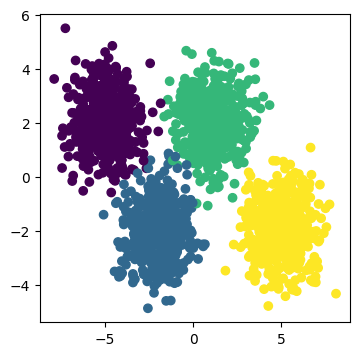

In [31]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
x, y = datasets.make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state = 30)

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x[:,0],x[:,1],c=y)

### Model

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, input_dim=2, activation="relu", name="L1"),
    tf.keras.layers.Dense(units=15, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=4, activation="linear")
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
)

model.fit(x,y,
          epochs=10)

Epoch 1/10
63/63 [==============================] - 2s 2ms/step - loss: 1.3426
Epoch 2/10
63/63 [==============================] - 0s 6ms/step - loss: 0.5840
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 0.3208
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1627
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0978
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 7/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0568
Epoch 8/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0488
Epoch 9/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0435
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0395


### Prediction

Not probabilities (due to from_logits = True)

In [45]:
prediction_vs_actual = np.c_[model.predict(x),y]
result = pd.DataFrame(prediction_vs_actual, columns=["Blob 0","Blob 1","Blob 2","Blob 3","Target"])
result

 1/63 [..............................] - ETA: 2s

63/63 [==============================] - 1s 10ms/step


,Blob 0,Blob 1,Blob 2,Blob 3,Target
0,-1.921025,-1.032947,3.579865,-0.614464,2.0
1,9.761733,4.577606,0.097702,-2.477002,0.0
2,7.101429,3.935252,0.214381,-2.197011,0.0
3,-0.889859,4.941849,0.161472,-1.992954,1.0
4,0.382263,-1.529065,4.785875,-2.353381,2.0
...,...,...,...,...,...
1995,-1.021967,-2.124511,0.377760,6.834757,3.0
1996,-2.518254,-1.333915,5.318317,-1.716686,2.0
1997,-1.950542,5.071509,0.042188,-1.761829,1.0
1998,-0.474756,-1.993577,-1.423519,8.268118,3.0


Probabilities

In [48]:
prediction_probability = tf.nn.softmax(model.predict(x)).numpy()
prediction_vs_actual = np.c_[prediction_probability, np.sum(prediction_probability, axis=1),y]
result = pd.DataFrame(prediction_vs_actual, columns=["Blob 0 prob","Blob 1 prob","Blob 2 prob","Blob 3 prob", "Sum of probabilities","Target"])
result

63/63 [==============================] - 1s 8ms/step


,Blob 0 prob,Blob 1 prob,Blob 2 prob,Blob 3 prob,Sum of probabilities,Target
0,0.003968,0.009643,0.971734,0.014655,1.0,2.0
1,0.994359,0.005573,0.000063,0.000005,1.0,0.0
2,0.958518,0.040415,0.000979,0.000088,1.0,0.0
3,0.002897,0.987850,0.008291,0.000961,1.0,1.0
4,0.012054,0.001783,0.985381,0.000782,1.0,2.0
...,...,...,...,...,...,...
1995,0.000386,0.000128,0.001566,0.997919,1.0,3.0
1996,0.000394,0.001288,0.997440,0.000878,1.0,2.0
1997,0.000884,0.991559,0.006488,0.001068,1.0,1.0
1998,0.000160,0.000035,0.000062,0.999744,1.0,3.0


# Answer

In [68]:
values_to_predict = np.array([[3,3],[-3,-3],[3,-3],[-3,3]])

In [95]:
prediction = tf.nn.softmax(model.predict(values_to_predict))
result = np.argmax(prediction, axis=1)

1/1 [==============================] - 0s 48ms/step


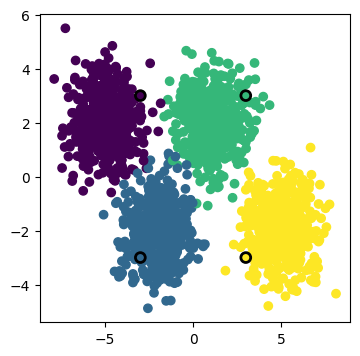

In [100]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x[:,0],x[:,1],c=y) # given
ax.scatter(values_to_predict[:,0],values_to_predict[:,1], c=result, s=50, edgecolors="black", linewidth=2) # prediction